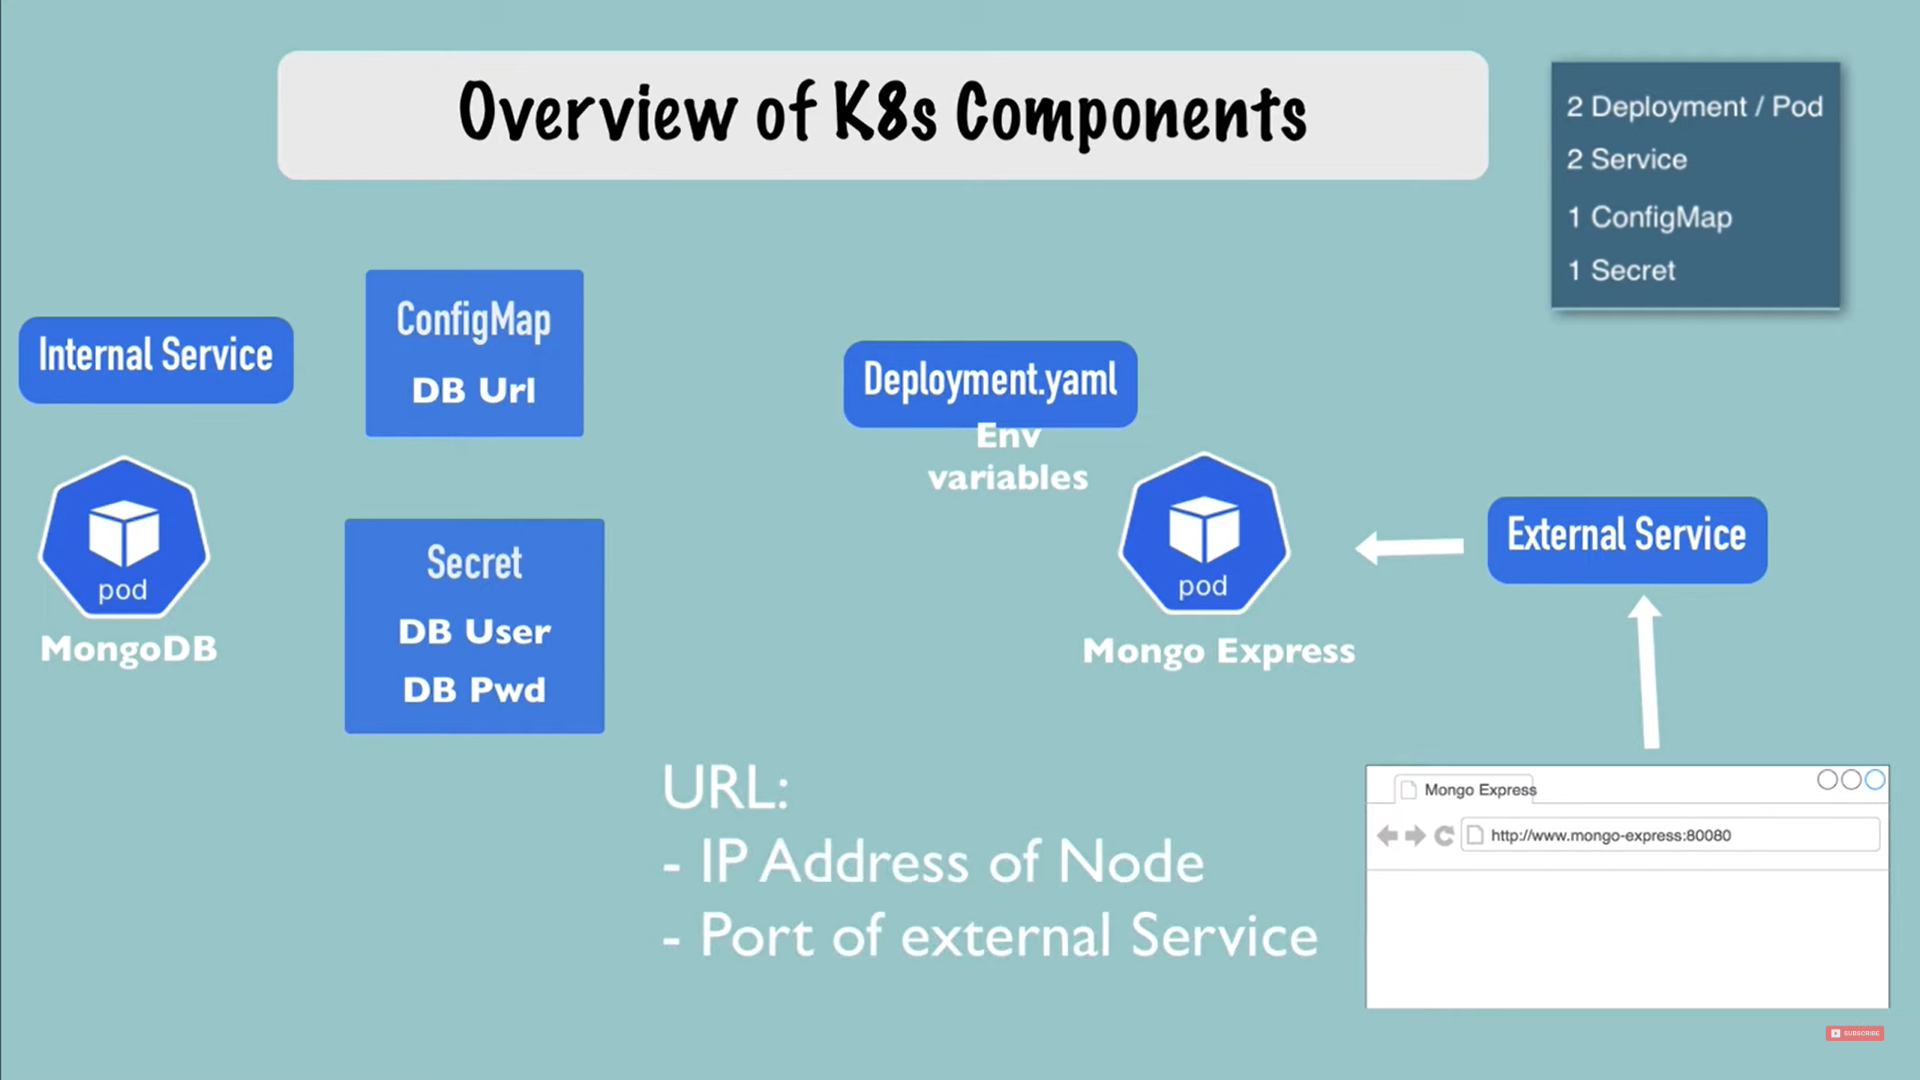

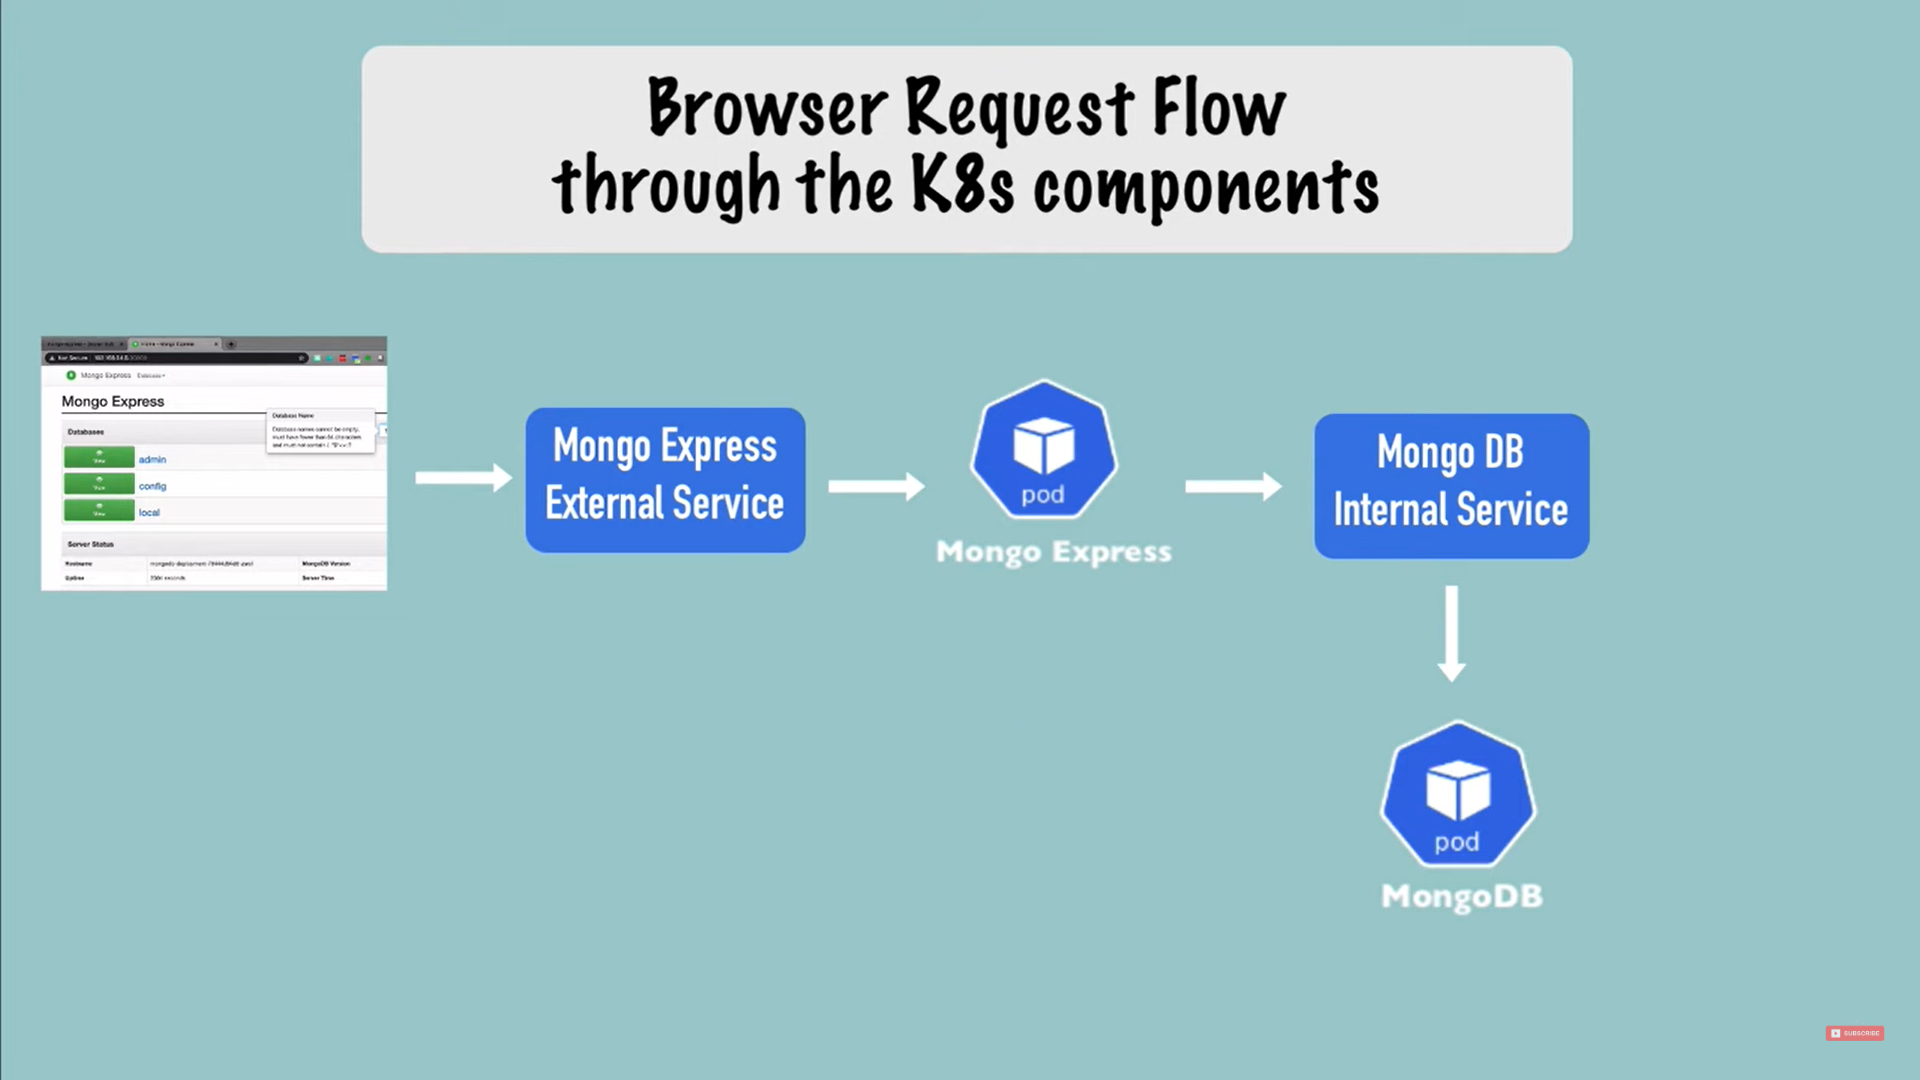

Here’s a **complete summary** of **“Complete Application Deployment using Kubernetes Components”** from **TechWorld with Nana – Kubernetes Tutorial 20**:

---

## 🎯 Goal of Tutorial 20

Demonstrate **how all Kubernetes components** (like Deployment, Service, ConfigMap, Secret, Volume) come together to deploy a **real-world application** (e.g., frontend + backend + DB) using YAML.

---

## 🧱 Components Involved in a Real Kubernetes App

### 1. **Deployment**

Defines and manages the **Pods** running your application (frontend, backend, DB, etc.)

### 2. **Service**

Exposes these Pods:

* Internal services (backend, DB) via `ClusterIP`
* External services (frontend) via `NodePort` or `LoadBalancer`

### 3. **ConfigMap**

Stores **non-sensitive config data** (e.g., `APP_ENV=prod`, or DB host info)

### 4. **Secret**

Stores **sensitive data** (e.g., passwords, API keys) securely in base64 encoded format.

### 5. **Persistent Volume (PV) + Persistent Volume Claim (PVC)**

Used to store **persistent data**, especially for databases like MongoDB or MySQL.

---

## 🔁 Sample Application Architecture

```
             +------------------+
             |    Frontend      |
             | (Node.js React)  |
             +--------+---------+
                      |
                      | Service (NodePort)
                      |
             +--------v---------+
             |   Backend (API)  |
             |  (Node.js, Express) |
             +--------+---------+
                      |
            +---------v----------+
            |   MongoDB (DB Pod) |
            |   with PVC volume |
            +-------------------+
```

---

## 🧾 YAML Components Summary

Each component has its own YAML file:

### 📄 `configmap.yaml`

```yaml
apiVersion: v1
kind: ConfigMap
metadata:
  name: app-config
data:
  DB_HOST: mongodb
  APP_ENV: production
```

---

### 📄 `secret.yaml`

```yaml
apiVersion: v1
kind: Secret
metadata:
  name: app-secret
type: Opaque
data:
  DB_PASSWORD: bXlzZWNyZXRwYXNzd29yZA==  # base64-encoded
```

---

### 📄 `mongodb-deployment.yaml`

Includes:

* Deployment for MongoDB
* PVC for persistent storage
* Mounts volume to `/data/db`

---

### 📄 `backend-deployment.yaml`

Includes:

* Uses environment variables from ConfigMap & Secret
* Connects to MongoDB service

---

### 📄 `frontend-deployment.yaml`

Includes:

* Node.js React app
* Exposed via NodePort or LoadBalancer

---

## 📦 Deploying the Full App

Once all YAML files are ready:

```bash
kubectl apply -f configmap.yaml
kubectl apply -f secret.yaml
kubectl apply -f mongodb-deployment.yaml
kubectl apply -f backend-deployment.yaml
kubectl apply -f frontend-deployment.yaml
```

---

## 🧪 Access the App

If `frontend` service uses `NodePort`:

```bash
minikube service frontend-service
```

This will open your app in the browser.

---

## 🛠️ Common Mistakes

| Problem                | Fix                                                  |
| ---------------------- | ---------------------------------------------------- |
| Secret not mounted     | Check `envFrom:` or volumeMount in YAML              |
| Service not accessible | Check type: `NodePort` or use `minikube service ...` |
| Pods crashlooping      | Run `kubectl logs <pod>` for error                   |
| DB not saving data     | Use Persistent Volume and mount correctly            |

---

## ✅ Final Thoughts

This tutorial shows how **config, secrets, storage, services, and deployments** are **decoupled and modular**, helping you:

* Scale apps independently
* Reuse config/secrets
* Maintain separation of concerns
* Prepare for CI/CD and production-level Kubernetes

---

Would you like:

* 📁 Ready-to-use YAML templates for this setup?
* 📄 This full summary as a downloadable PDF?
* 🎥 Timestamps for the video sections?

Let me know and I’ll share them right away.
